In [1]:
%load_ext autoreload
%autoreload 2
%pylab widget

Populating the interactive namespace from numpy and matplotlib


In [4]:
import fastcat as fc
import glob

In [5]:
# Now looking at the full thing

In [57]:
s = fc.calculate_spectrum(100, 14, 5, 100,monitor=None)
s.attenuate(0.3,fc.get_mu(z=13))
s.attenuate(0.089,fc.get_mu(z=22))

In [7]:
# np.save('data/energies.npy',xx)
# np.save('data/spec_100.npy',yy)

In [14]:
plt.close('all')

In [35]:
xx,yy = s.get_points()

plt.figure()
plt.plot(xx,yy)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [60]:
MV_detectors = ['CsI-784-micrometer']
angles = np.linspace(np.pi/2,np.pi*2,2)      
phantom = fc.Catphan_404()
phantom.geomet.DSD = 1530 #1520 JO dec 2020 1500 + 20 for det casing
phantom.phan_map = ['air','G4_POLYSTYRENE','G4_POLYVINYL_BUTYRAL','G4_POLYVINYL_BUTYRAL','CATPHAN_Delrin','G4_POLYVINYL_BUTYRAL','CATPHAN_Teflon_revised','air','CATPHAN_PMP','G4_POLYVINYL_BUTYRAL','CATPHAN_LDPE','G4_POLYVINYL_BUTYRAL','CATPHAN_Polystyrene','air','G4_POLYVINYL_BUTYRAL','air','CATPHAN_Teflon_revised','air','air','air','air'] 
# phantom.phan_map = ['air','CATPHAN_Polystyrene','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Acrylic']
# phantom.phan_map = ['air','air','air','air','air','air','air','air','air','air','air','air','air','air','air','air','air','air','air','air','air','air']

# print((0.776/0.784)**2)
kernel = fc.Detector(s, MV_detectors[0])
kernel.add_focal_spot(1.2)
phantom.phan_map = ['air','G4_POLYSTYRENE','G4_POLYVINYL_BUTYRAL','G4_POLYVINYL_BUTYRAL','CATPHAN_Delrin','G4_POLYVINYL_BUTYRAL','CATPHAN_Teflon_revised','air','CATPHAN_PMP','G4_POLYVINYL_BUTYRAL','CATPHAN_LDPE','G4_POLYVINYL_BUTYRAL','CATPHAN_Polystyrene','air','CATPHAN_Acrylic','air','CATPHAN_Teflon_revised','air','air','air','air'] 
# phantom.phan_map = ['air','G4_NYLON-8062','CATPHAN_Acrylic','CATPHAN_Acrylic','CATPHAN_Delrin_revised','CATPHAN_Acrylic','CATPHAN_Teflon_revised','air','CATPHAN_PMP','CATPHAN_Acrylic','CATPHAN_LDPE','CATPHAN_Acrylic','CATPHAN_Polystyrene','air','CATPHAN_Acrylic','air','CATPHAN_Teflon','air','air','air','air'] 
phantom.return_projs(kernel,s,angles,mgy=18,bowtie=True,filter='bowtie_asym2') 
# phantom.return_projs(kernel,s,angles,mgy = 0.3*21.1/1000,scat_on=True,bowtie=True,filter='bowtie3')

19
[2021-07-21 09:50:22,273] {simulate.py:214} INFO - Initializing filter bowtie_asym2
[2021-07-21 09:50:22,302] {simulate.py:383} INFO -    Scatter is filtered by bowtie
[2021-07-21 09:50:22,303] {simulate.py:463} INFO -     Interp scatter 512 to 512 pixels
[2021-07-21 09:50:22,303] {simulate.py:463} INFO -     Interp scatter 512 to 512 pixels
[2021-07-21 09:50:22,778] {simulate.py:531} INFO - Running Simulations
[2021-07-21 09:50:22,778] {simulate.py:535} INFO -     1.2 mm focal spot added
[2021-07-21 09:50:22,779] {simulate.py:555} INFO -     Simulating 10 keV
[2021-07-21 09:50:23,227] {simulate.py:555} INFO -     Simulating 20 keV
[2021-07-21 09:50:23,660] {simulate.py:555} INFO -     Simulating 30 keV
[2021-07-21 09:50:24,091] {simulate.py:555} INFO -     Simulating 40 keV
[2021-07-21 09:50:24,521] {simulate.py:555} INFO -     Simulating 50 keV
[2021-07-21 09:50:24,969] {simulate.py:555} INFO -     Simulating 60 keV
[2021-07-21 09:50:25,395] {simulate.py:555} INFO -     Simulating

In [17]:
Air_long = (np.mean(np.load('/media/xcite/DATA/MV_CBCT/projections/kv_air.npy')[69,:][-1::-1],0))

In [19]:
Catphan2 = np.mean(np.load('/media/xcite/DATA/MV_CBCT/projections/kv_phantom.npy')[69,440:471],0)[-1::-1]
Air = np.mean(np.load('/media/xcite/DATA/MV_CBCT/projections/kv_air.npy')[69,440:471],0)[-1::-1]

In [21]:
Air_im = np.load('/media/xcite/DATA/MV_CBCT/projections/kv_air.npy')[69,440:472][-1::-1]

In [20]:
Catphan_im = np.load('/media/xcite/DATA/MV_CBCT/projections/kv_phantom.npy')[483,440:472][-1::-1]

In [61]:
fastcat_im = (phantom.proj[0]/10)

# plt.figure()#figsize=[4,4])
# plt.subplot(121)
# plt.imshow(fastcat_im.T,cmap = 'gray')#,aspect='auto')

dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512)
bcca_6x_im = -1*np.log(Catphan_im/Air_long)
# bcca_6x_im = -1*np.log(Catphan_im/np.mean(Air_im,0))
bcca_small_im = (bcca_6x_im[:,::2]+bcca_6x_im[:,1::2])/2
bcca_smaller_im = (bcca_small_im[::2,:]+bcca_small_im[1::2,:])/2

# plt.subplot(122)
# plt.imshow(bcca_smaller_im.T,cmap='gray')#,aspect='auto')
# plt.tight_layout()

# np.save('../scripts/test_data/kV_experimental_profile',10*bcca_smaller_im[5])

print(np.max(np.abs(np.roll(phantom.proj[0,5],-3)-bcca_smaller_im[5]*10)))

# plt.figure()
# plt.plot(np.roll(np.mean(phantom.proj[0],0),-3))
# plt.plot(bcca_smaller_im[5]*10)
# plt.plot(np.roll(np.mean(phantom.proj[0],0),-3)-bcca_smaller_im[5]*10)
plt.figure()
plt.plot(dist,(bcca_smaller_im[5]),c='darkorange',lw=0.7)
plt.plot(dist,np.roll((fastcat_im[5]),-3),c='cornflowerblue',lw=0.7)

2.2695608050213423


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [167]:
dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512) # TODO: fix this gore!!
dist2 = np.linspace(-256*0.0776 - 0.0388,256*0.0776 - 0.0388, 512) # TODO: fix this gore!!
plt.figure(figsize=[4,4])
plt.plot(dist,1.03*np.roll(np.mean((phantom.proj[0]/10)[19:20],0),-3),linewidth = 1.0,color = 'cornflowerblue')
plt.xlim([-20,20])

bcca_6x = -1*np.log(Catphan2/Air)
bcca_small = (bcca_6x[::2]+bcca_6x[1::2])/2

plt.plot(dist2,bcca_small,'-',linewidth = 1,color = 'darkorange')
plt.legend(['fastCAT 6 MV W', 'Topas 6 MV W','Varian Truebeam 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Energy Deposition [MeV]')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [72]:
plt.figure()
plt.plot(s.x,s.y)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
kernel = fc.Kernel(s, MV_detectors[0])
kernel.add_focal_spot(1.2)
phantom.return_projs(kernel,s,angles,mgy = 0.,bowtie=True,scat_on=False,filter='bowtie1')

In [ ]:
import glob

In [ ]:
plt.figure()
plt.plot(phantom.fs[0],'y')
plt.plot(phantom.fs[1],'b')
plt.plot(phantom.fs[2],'r')
plt.plot(phantom.fs[3],'g')
plt.plot(phantom.fs[4],'k*')
plt.plot(phantom.fs[5],'y')
plt.plot(phantom.fs[6],'b')
plt.plot(phantom.fs[7],'r')
plt.plot(phantom.fs[8],'g')
plt.plot(phantom.fs[9],'k*')

# This is extra

In [11]:
plt.figure()
plt.plot((bcca_small - no_noise)[100:-350],'r')
plt.plot((np.roll(np.mean((phantom.proj[0]/10)[4:5],0),2) - no_noise)[100:-350])
a = (bcca_small - no_noise)[100:-350]
b = (np.roll(np.mean(phantom.proj[0]/10,0),2) - no_noise)[100:-350]

print(np.std(a),np.std(b))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'no_noise' is not defined

In [12]:
dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512) # TODO: fix this gore!!
factor = (152/(np.sqrt(dist**2 + 152**2)))**3
flood_summed = factor*660

plt.figure()
plt.subplot(111)

dist_long = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 1024)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
plt.plot(dist,np.roll(-np.log((scats[0][-1::-1])/flood_summed),2),linewidth = 1.0,color = 'cornflowerblue')

plt.plot(dist,-1.0*np.log(real_spec_CT/real_spec_air),'k-.',linewidth = 0.4,markersize=0.4)
plt.xlim([-20,20])
# plt.plot(dist_long,(np.mean(Air[63,200:220],0)/3)[-1::-1],'-',linewidth = 1,color = 'darkorange')
plt.plot(dist_long,-1*np.log((np.mean(Catphan2[63,270:290],0))[-1::-1]/(np.mean(Air[63,270:275],0))[-1::-1]),'-',linewidth = 1,color = 'darkorange')
plt.legend(['fastCAT 6 MV W', 'Topas 6 MV W','Varian Truebeam 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Energy Deposition [MeV]')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'scats' is not defined

In [13]:
plt.figure()
plt.subplot(111)

dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512)
dist_long = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 1024)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
plt.plot(dist,(scats[0][-1::-1]),linewidth = 1.0,color = 'cornflowerblue')

plt.plot(dist,93.25*real_spec_CT,'k-.',linewidth = 0.4,markersize=0.4)
plt.plot(dist,14.25*real_spec_CT_2,'r-.',linewidth = 0.4,markersize=0.4)
plt.xlim([-20,20])
# plt.plot(dist_long,(np.mean(Air[63,200:220],0)/3)[-1::-1],'-',linewidth = 1,color = 'darkorange')
plt.plot(dist_long,(np.mean(Catphan2[63,270:271],0)/3)[-1::-1],'-',linewidth = 1,color = 'darkorange')
plt.legend(['fastCAT 6 MV W', 'Topas 6 MV W','Varian Truebeam 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Energy Deposition [MeV]')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'scats' is not defined

In [14]:
dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512) # TODO: fix this gore!!
factor = (152/(np.sqrt(dist**2 + 152**2)))**3
flood_summed = factor*660

plt.figure()
plt.subplot(111)

dist_long = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 1024)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
plt.plot(dist,np.roll((flood_summed),2)/np.mean(flood_summed),linewidth = 1.0,color = 'cornflowerblue')

plt.plot(dist,real_spec_air/np.mean(real_spec_air),'k-.',linewidth = 0.4,markersize=0.4)
plt.xlim([-20,20])
# plt.plot(dist_long,(np.mean(Air[63,200:220],0)/3)[-1::-1],'-',linewidth = 1,color = 'darkorange')
plt.plot(dist_long,np.mean(Air[63,270:275],0)[-1::-1]/np.mean(np.mean(Air[63,270:275],0)[-1::-1]),'-',linewidth = 1,color = 'darkorange')
plt.legend(['fastCAT 6 MV W', 'Topas 6 MV W','Varian Truebeam 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Energy Deposition [MeV]')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'real_spec_air' is not defined

# Now lets look at the sensiometry module

In [21]:
spectra = ['Varian_truebeam']
MV_detectors = ['CuGOS-784-micrometer']

angles = np.linspace(np.pi/2,np.pi*2,2)      

phantom = fc.Catphan_404()
# phantom.phan_map = ['air','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene','CATPHAN_Polystyrene']
phantom.phan_map = ['air','water','water','CATPHAN_B20','CATPHAN_Delrin','water','CATPHAN_Teflon_revised',
                    'air','CATPHAN_PMP','CATPHAN_B50','CATPHAN_LDPE','water','CATPHAN_Polystyrene','air',
                    'CATPHAN_Acrylic','water','water','water','water','water'] 
s = fc.Spectrum()

s.load(spectra[0])
s.x[0] = 1
s.x[1] = 2
s.attenuate(0.7,fc.get_mu(z=13)) #3.7
kernel = fc.Kernel(s, MV_detectors[0])
phantom.return_projs(kernel,s,angles,mgy = 0.05,bowtie=True,filter='FF3')

(19, 41, 41) 19
bowtie is off False
Using the bowtie filter True
really doing it!
ratio is 56.33998147405341 number of photons 0.02463638040270006


In [22]:
real_spec_CT_2 = np.load('/home/xcite/scintillators/MV_CBCT_exp/Catphan_404_w_det.npy')
real_spec_CT = np.load('/home/xcite/scintillators/MV_CBCT_exp/varian_deposition_jaws.npy')
real_spec_air = np.load('/home/xcite/scintillators/MV_CBCT_exp/varian_deposition_jaws_air.npy')
Catphan2 = np.load('/home/xcite/MV_CBCT/projections/mv_300_6x.npy')
Air = np.load('/home/xcite/MV_CBCT/projections/mv_air.npy')

In [23]:
dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512) # TODO: fix this gore!!
factor = (152/(np.sqrt(dist**2 + 152**2)))**3
flood_summed = factor*660

from scipy.signal import convolve

kernel.kernel = kernel.kernels[:-1].T@phantom.weights_small.T
kernel_1d = kernel.kernel[:,kernel.kernel.shape[0]//2]
kernel_1d /= np.sum(kernel_1d)
flood_summed = convolve(flood_summed,kernel_1d, mode = 'same')

plt.figure()
plt.subplot(111)

dist_long = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 1024)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
plt.plot(dist,np.roll(np.mean(phantom.proj[0]/10,0),-4)[-1::-1],linewidth = 1.0,color = 'cornflowerblue')

# plt.plot(dist,-1.0*np.log(real_spec_CT/real_spec_air),'k-.',linewidth = 0.4,markersize=0.4)
plt.xlim([-20,20])
bcca_6x = -1*np.log((np.mean(Catphan2[122,390:391],0))[-1::-1]/(np.mean(Air[63,270:275],0))[-1::-1])
bcca_small = (bcca_6x[::2]+bcca_6x[1::2])/2
# plt.plot(dist_long,(np.mean(Air[63,200:220],0)/3)[p1::-1],'-',linewidth = 1,color = 'darkorange')
plt.plot(dist,bcca_small,'-',linewidth = 1,color = 'darkorange')
plt.legend(['fastCAT 6 MV W', 'Topas 6 MV W','Varian Truebeam 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Energy Deposition [MeV]')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [167]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = 10 #self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

fig, ax = plt.subplots(1, 1)

# X = np.array(projections.T[:,:,5:])
X = np.array((-np.log(Catphan2/Air[1:])).T)

tracker = IndexTracker(ax, X)

fig.canvas.mpl_connect('scroll_event', tracker.onscroll)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [115]:
plt.figure()
plt.imshow(Catphan2[63])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plt.figure()
dep = np.array(np.load(kernel.deposition_efficiency_file))
plt.semilogx(dep[1],dep[0]/dep[1])
plt.grid()

In [73]:
phantom.flood_summed

AttributeError: 'Catphan_404' object has no attribute 'flood_summed'

# This is actually quite a good test

In [56]:
spectra = ['Varian_truebeam_phasespace']
# spectra = ['W_spectrum_6']

MV_detectors = ['CuGOS-784-micrometer']
scats = []

angles = np.linspace(np.pi/2,np.pi*2,2)      
# angles = np.linspace(0,np.pi*2,2)        

phantom = fc.Catphan_404()
phantom.phan_map = ['water']*25
# phantom.phan_map = ['air','water','water','water','water','water','water','water','water','water','water','water','water','water','water','water','water']
# phantom.phan_map = ['air','water','CATPHAN_Polystyrene','CATPHAN_B20','CATPHAN_Delrin','water','CATPHAN_Teflon_revised','air','CATPHAN_PMP','CATPHAN_B50','CATPHAN_LDPE','water','CATPHAN_Polystyrene','air','CATPHAN_Acrylic'] 
s = fc.Spectrum()

# phantom.phan_map = ['air','water']+['CATPHAN_Polystyrene']*14

for spectrum in spectra:

    s.load(spectrum)
    s.x = np.array([290,300,310,3000])
    s.y = np.array([0,1,0,0])
    kernel = fc.Kernel(s, MV_detectors[0])
    kernel.deposition_interpolated = np.array([1,0,0])
#     kernel.deposition_efficiency_file = '/home/xcite/fastcat-0.0.1/tests/paper_3/dummy_deposition_300.npy'
    phantom.return_projs(kernel,s,angles,mgy = 0.,scat_on=False)#,convolve_on=False)#,det_on=False)
    scats.append(np.max(phantom.proj[0],0))

[2021-05-11 09:27:31,919] {fastcat.py:577} INFO - Interpolating from 512 scatter
[2021-05-11 09:27:31,919] {fastcat.py:577} INFO - Interpolating from 512 scatter
[2021-05-11 09:27:32,490] {fastcat.py:625} INFO - Running Simulations
[2021-05-11 09:27:32,491] {fastcat.py:633} INFO -     Simulating 300 keV
[2021-05-11 09:27:32,931] {fastcat.py:692} INFO - Weighting simulations
[2021-05-11 09:27:32,932] {fastcat.py:752} INFO -     No noise was added


/home/xcite/fastcat-0.0.1/fastcat/fastcat.py:689: RuntimeWarning: invalid value encountered in double_scalars
  self.weights_small3 = weights_energies[jj]/weights_xray_small[jj]


In [57]:
plt.figure()
plt.plot(scats[0])
# plt.plot([0,512],[20*1.186*.97]*2)
plt.plot([0,512],2*[0.97*0.1186*20*10])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [83]:
phantom.__dict__

{'phantom': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0.

In [35]:
plt.figure()
plt.subplot(111)

dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512)
dist_long = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 1024)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
plt.plot(dist,(scats[0][-1::-1]),linewidth = 1.0,color = 'cornflowerblue')

plt.plot(dist,92*real_spec_CT,'k-.',linewidth = 0.4,markersize=0.4)
plt.xlim([-20,20])
# plt.plot(dist_long,(np.mean(Air[63,200:220],0)/3)[-1::-1],'-',linewidth = 1,color = 'darkorange')
plt.plot(dist_long,(np.mean(Catphan2[61,290:301],0)/3.4)[-1::-1],'-',linewidth = 1,color = 'darkorange')
plt.legend(['fastCAT 6 MV W', 'Topas 6 MV W','Varian Truebeam 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Energy Deposition [MeV]')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [362]:
weights_woutdet2 = phantom.weights_small

(19, 41, 41) 19
[0.00000000e+00 1.97676735e-04 4.59538275e-03 1.87763403e-02
 2.69218011e-02 2.19212151e-02 2.16033405e-02 2.61904166e-02
 3.32862718e-02 3.19644957e-02 2.81112167e-02 3.27392041e-02
 3.49504830e-02 3.46741088e-02 3.36192686e-02 3.02069999e-02
 2.63395066e-02 2.97071624e-02 2.38111659e-02 2.25007260e-02
 2.10556003e-02 1.95742454e-02 1.83324695e-02 1.69440891e-02
 1.62341136e-02 1.54300915e-02 1.46698057e-02 1.35275988e-02
 1.28700969e-02 1.21599095e-02 1.14506187e-02 1.09809591e-02
 1.05724920e-02 1.01646457e-02 9.76984695e-03 9.44686642e-03
 9.04474348e-03 8.69744479e-03 8.36870305e-03 8.00925220e-03
 7.77000158e-03 7.51854020e-03 7.09571857e-03 7.01812092e-03
 6.65557358e-03 6.37730877e-03 6.17624050e-03 6.03458005e-03
 5.67710643e-03 5.55974435e-03 5.41242980e-03 5.21155994e-03
 5.07713105e-03 4.80127970e-03 4.54499759e-03 4.51834069e-03
 4.30765877e-03 4.12906655e-03 4.05679017e-03 3.96064121e-03
 3.77928558e-03 3.67974928e-03 3.48113359e-03 3.33273164e-03
 3.29799

<IPython.core.display.Javascript object>


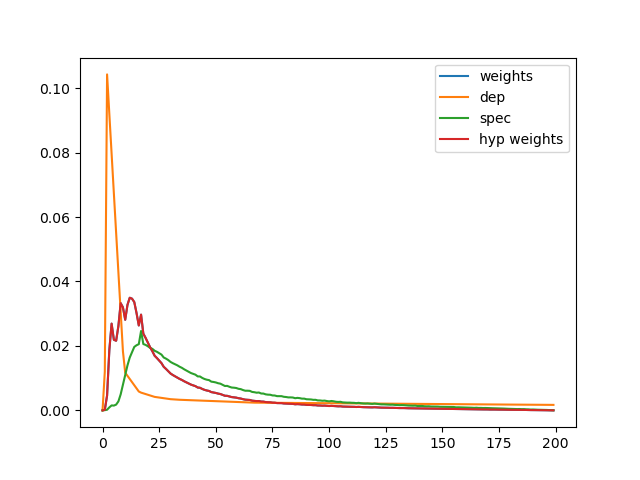

In [149]:
spectra = ['W_spectrum_6']
MV_detectors = ['CuGOS-784-micrometer']
scats = []

angles = np.linspace(np.pi/2,np.pi*2,2)        
phantom = fc.Catphan_404()
s = fc.Spectrum()

for spectrum in spectra:

    s.load(spectrum)
    kernel = fc.Kernel(s, MV_detectors[0])

plt.figure()
plt.plot(kernel.weights/np.sum(kernel.weights),label='weights')
plt.plot(kernel.deposition_interpolated/np.sum(kernel.deposition_interpolated),label='dep')
plt.plot(kernel.fluence,label='spec')
ww = kernel.fluence*kernel.deposition_interpolated
plt.plot(ww/np.sum(ww),label='hyp weights')
plt.legend()

<IPython.core.display.Javascript object>


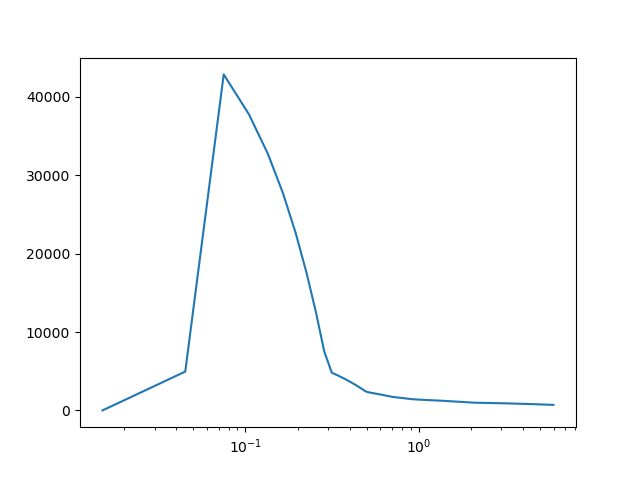

In [153]:
plt.figure()
plt.semilogx(s.x/1000,kernel.deposition_interpolated)

In [386]:
dat = np.load('../fastcat/data/scatter/scatter_updated.npy')

In [390]:
dat2 = np.load('/home/xcite/scintillators/MV_CBCT_exp/scatter_edep.npy')

<IPython.core.display.Javascript object>


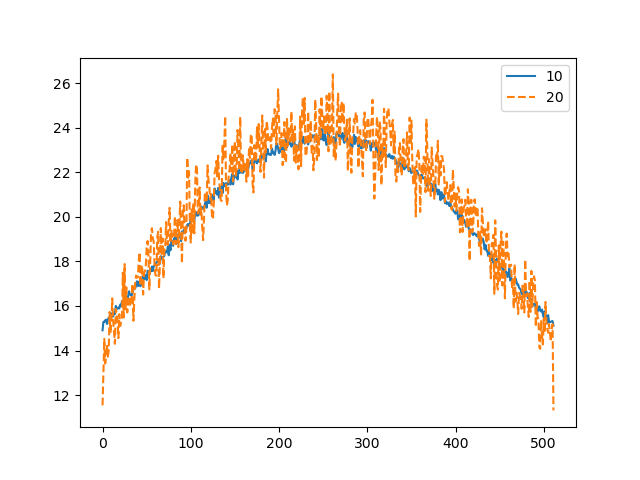

In [628]:
plt.figure()
plt.plot(dat@phantom.weights_small,'-')
plt.plot(16.5*np.sum(dat2.T,1),'--')
plt.legend(original_energies_keV)

<IPython.core.display.Javascript object>


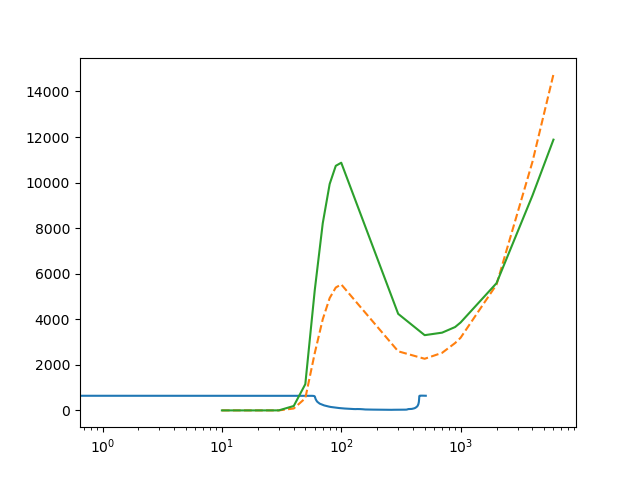

In [578]:
dat3 = np.load('/home/xcite/scintillators/MV_CBCT_exp/primary_edep.npy')

# nw = phantom.weights_small*(phantom.deposition_summed/original_energies_keV)
# nw /= np.sum(nw)
plt.figure()
plt.plot((np.array(phantom.projections).T@phantom.weights_small),'-')
plt.plot((np.array(phantom.projections).T@phantom.weights_small),'-')

plt.semilogx(original_energies_keV,10*np.sum(dat3.T,0),'--')
plt.semilogx(original_energies_keV,phantom.deposition_summed*(original_energies_keV/1000)*1000000)

In [579]:
from scipy.optimize import minimize_scalar

In [611]:
res = []

for ii in range(18):
    a = dat3.T[:,ii]
    b = (np.array(phantom.projections).T*phantom.weights_small*phantom.deposition_summed*original_energies_keV/2000)[:,ii]
    res.append(minimize_scalar(min_fun,args=(a,b)).x)

In [612]:
def min_fun(x,a,b):
    
    return(np.std(x*a - b))

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


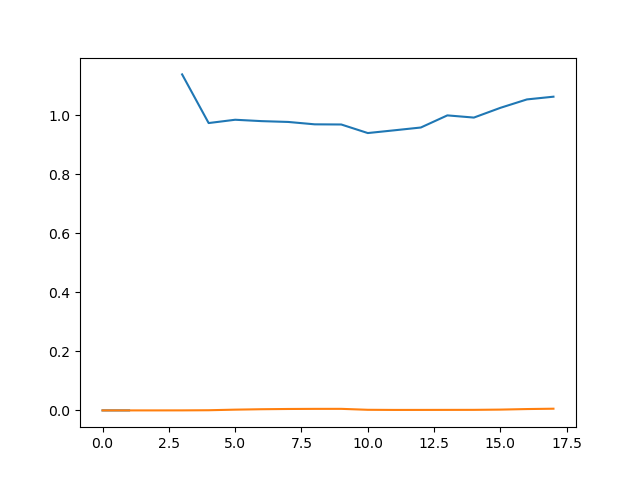

In [613]:
c = phantom.weights_small/res

plt.figure()
plt.plot(c)
plt.plot(phantom.deposition_summed*original_energies_keV/2070)

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


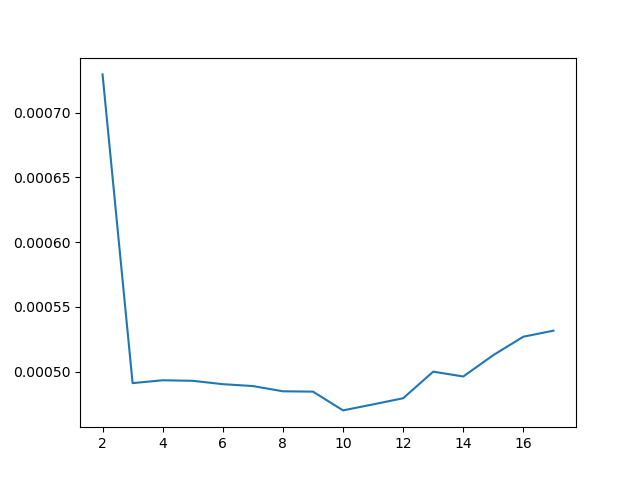

In [562]:
c = (phantom.weights_small)/(res*phantom.deposition_summed*original_energies_keV)

plt.figure()
plt.plot(c)
# plt.plot(phantom.deposition_summed*original_energies_keV/2000)

<IPython.core.display.Javascript object>


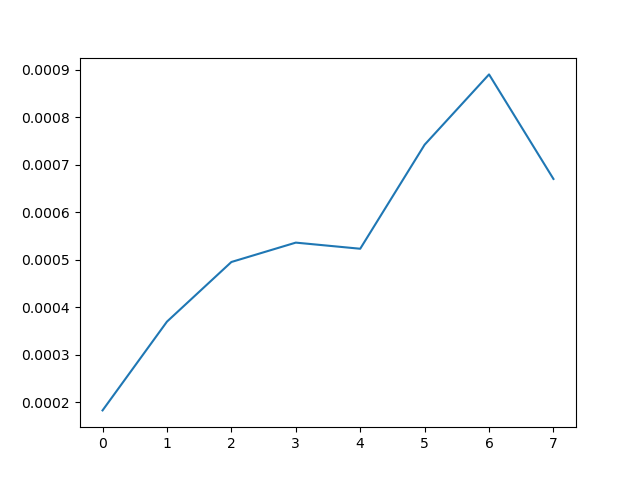

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [525]:
plt.figure()
plt.plot((c/(phantom.deposition_summed*(original_energies_keV/1000)))[10:])

<IPython.core.display.Javascript object>


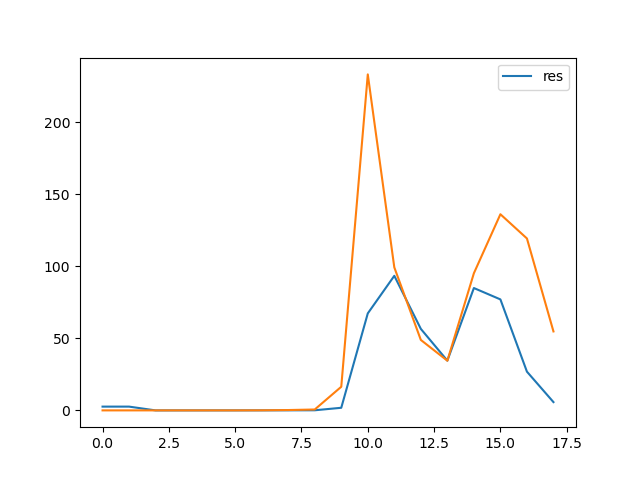

In [506]:
plt.figure()
plt.plot(res,label='res')
plt.plot(16000*phantom.weights_small*(phantom.deposition_summed*original_energies_keV/100))
plt.legend()

<IPython.core.display.Javascript object>


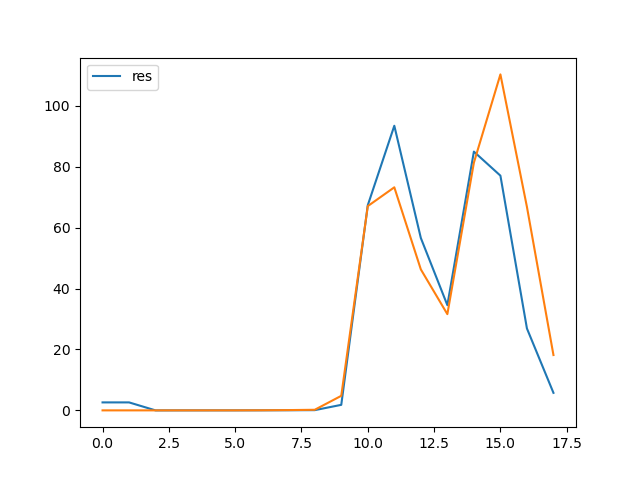

In [491]:
plt.figure()
plt.plot(res,label='res')
plt.plot(500*phantom.weights_small)
plt.legend()

<IPython.core.display.Javascript object>


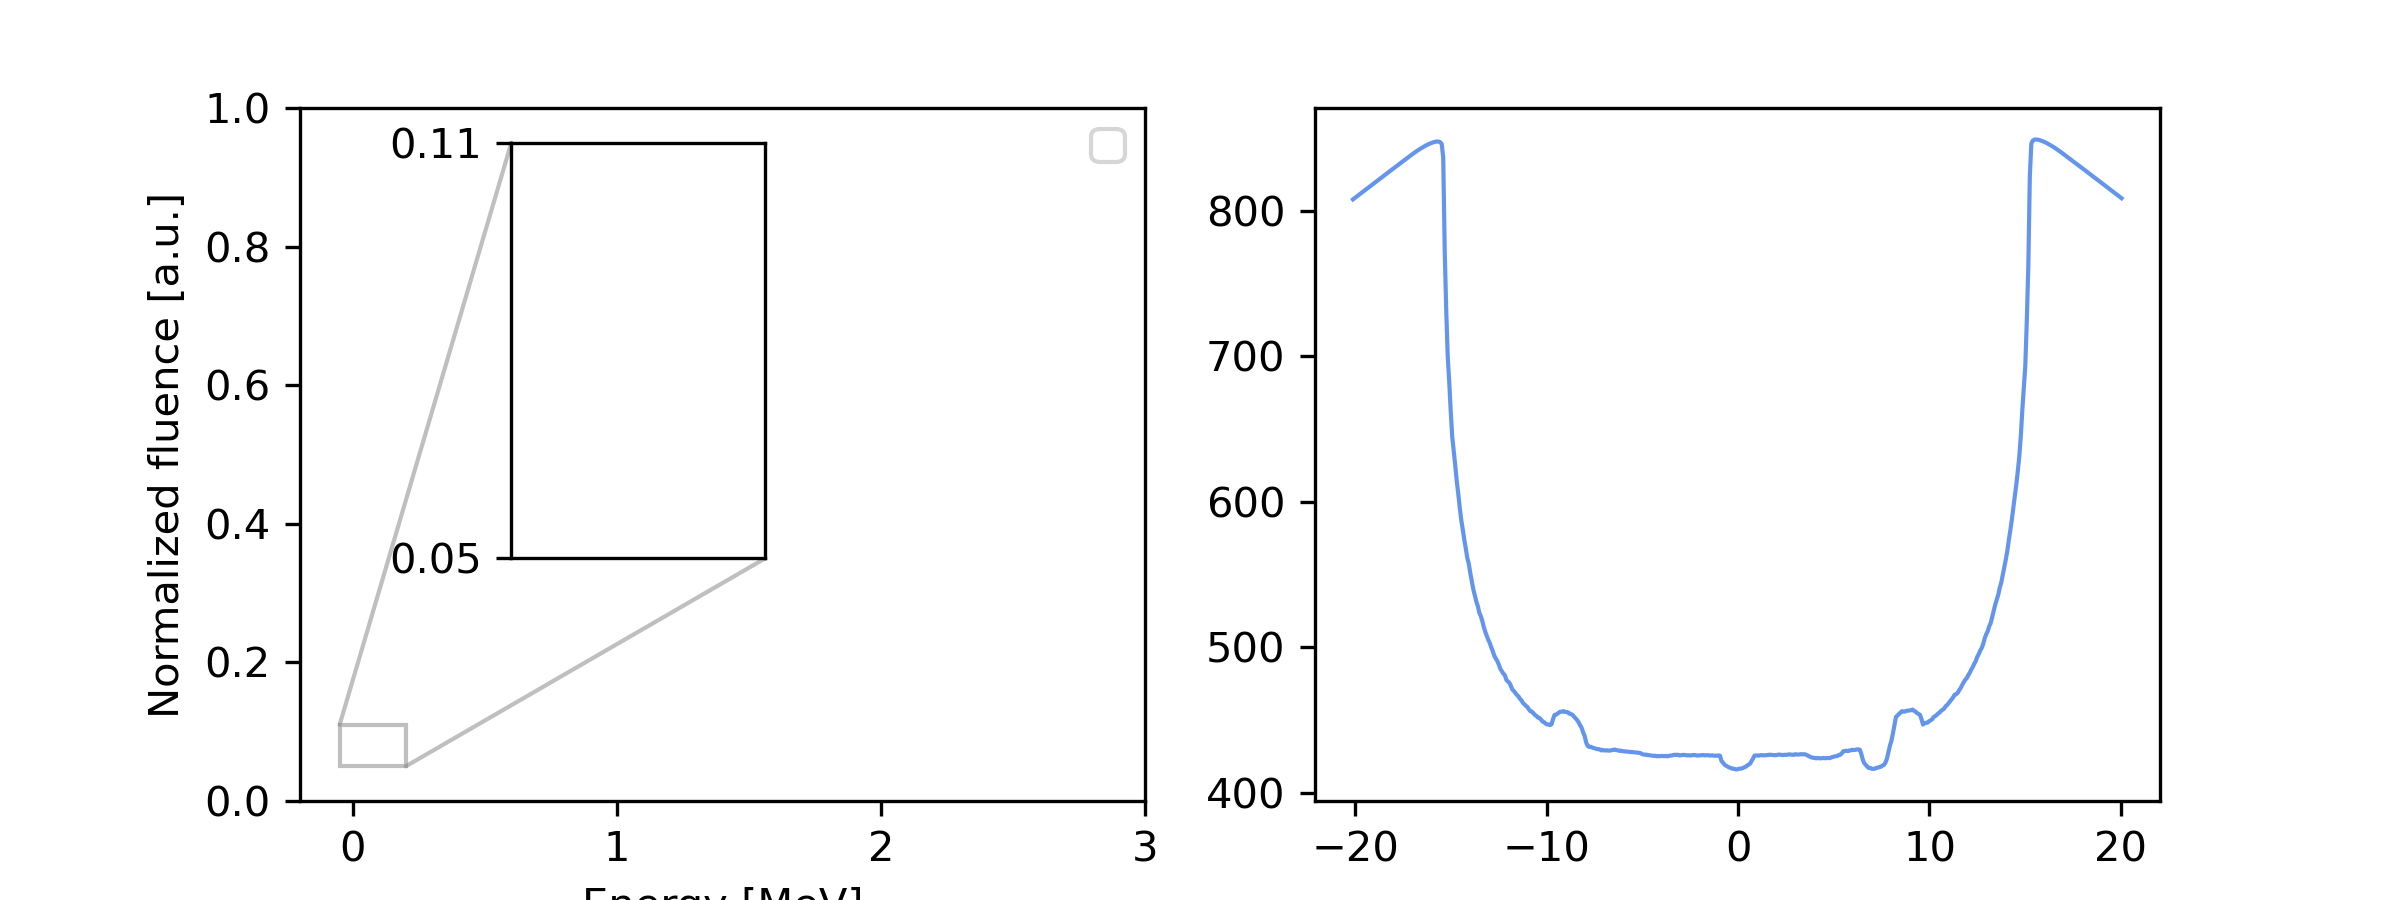

IndexError: list index out of range

In [303]:
# plt.figure()
# plt.plot(-np.log(mc_noise/flood_summed2))

# plt.figure(dpi=300,figsize=[8,4])
# plt.subplot(121)

files = glob.glob('../xpecgen/data/MV_spectra/*.txt')

fig,ax = plt.subplots(1,2,figsize=[8,3],dpi=300)
names = []

fmt_spec = ['-', ':', '-', ':','-', ':', '-', ':']
colors = ['cornflowerblue','cornflowerblue','darkorange','darkorange','k','k',]

ax2 = ax[0].inset_axes([0.25, 0.35, 0.3, 0.6])
# axin2 = ax.inset_axes(
#         [-0.1, 0.04, 0.4, 0.08], transform=ax.transData)
# axin2.set_xticks([])
# axin2.set_yticks([])

for jj,file in enumerate(sorted(files)):
    
    fluence = []
    energies = []
    
    names.append(file.split('_'))

    with open(file) as f:

        for line in f:
            energies.append(float(line.split()[0]))
            fluence.append(float(line.split()[1]))

    fluence /= np.sum(fluence)
    
    ax[0].plot(energies,fluence,fmt_spec[jj],color=colors[jj])
    ax2.plot(energies,fluence,fmt_spec[jj],color=colors[jj])


    fluence_str = [str(fluenc) for fluenc in fluence]
    energies = [str(energy) for energy in energies]
    with open(file.split('.txt')[0] + 'topas','w') as out:
        out.write(file + '\n \n')
        out.write('dv:So/Example/BeamEnergySpectrumValues = ' + str(len(energies)) +' ' + ' '.join(energies) + '\n')
        out.write('uv:So/Example/BeamEnergySpectrumWeights = ' + str(len(energies)) + ' ' + ' '.join(fluence_str) + '\n \n')
        
labels = []

for ii in range(len(names)):
    
    labels.append(names[ii][1].split('/')[1] + ' 6 MV' if ii % 2 == 1 else names[ii][1].split('/')[1] + ' 2.5 MV')
    
ax[0].legend(labels)
ax[0].set_xlim([-0.2,3])
ax[0].set_xlabel('Energy [MeV]')
ax[0].set_ylabel('Normalized fluence [a.u.]')


ax2.set_xlim([-0.05,0.2])
ax2.set_ylim([0.05,0.11])
ax2.set_xticks([])
ax2.set_yticks([0.05,0.11])

ax[0].indicate_inset_zoom(ax2)

# plt.subplot(122)
# plt.plot(2*mc_noise)

# The primary projection don't include any scatter should add the coherent and the incoherent scatter
ax[1].plot(dist,scats[0],linewidth = 1.0,color = 'cornflowerblue')
ax[1].plot(dist,scats[1],linewidth = 1.0,color = 'darkorange')

# plt.plot(fc_prime_2 + 3*mc_scatter - 2*coh_scatter,'r',linewidth= 0.7)
# plt.plot(fc_prime_2)
# plt.plot(flood_summed2)
ax[1].plot(dist,real_spec,'k-',linewidth = 0.4)
ax[1].plot(dist,np.mean(real_spec_CT,0),'k-.',linewidth = 0.4,markersize=0.4)
ax[1].set_xlim([-20,20])
# plt.plot(dist,real_spec_water_2,'k--',linewidth = 0.7)
# plt.plot(real_spec_water_3*2,'k--',linewidth = 0.7)

ax[1].legend(['fastCAT 6 MV W','fastCAT 6 MV Al','Topas 6 MV W','Topas 6 MV Al'])
ax[1].set_xlabel('[cm]')
ax[1].set_ylabel('Counts')
plt.tight_layout()
# plt.plot(real_spec_water,'k',linewidth= 0.7)
# plt.plot(fc_prime_2 + 2*mc_scatter_e,'r')
# plt.plot(2*mc_noise,'g')
# plt.plot(fc_prime_2,'.')